In [1]:
import pandas as pd
from transformers import pipeline
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#visuals
import matplotlib.pyplot as plt
from wordcloud import WordCloud

c:\Users\user\Desktop\week2\bank-review-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
# Step 1: Load cleaned reviews
df = pd.read_csv("../data/raw_reviews.csv")

In [4]:
df

,review,rating,date,bank,source
0,really am happy to this app it is Siple to use...,5,2025-06-07,CBE,Google Play
1,I liked this app. But the User interface is ve...,2,2025-06-07,CBE,Google Play
2,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play
3,what is this app problem???,1,2025-06-05,CBE,Google Play
4,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play
...,...,...,...,...,...
1195,Dashen yichalal. Ewnetem one step a head,5,2025-01-17,Dashn,Google Play
1196,It has a Good performance but need more upgrad...,4,2025-01-17,Dashn,Google Play
1197,It is a very wonderful work that has saved its...,5,2025-01-17,Dashn,Google Play
1198,“Life-changing!” I can’t imagine going back to...,5,2025-01-17,Dashn,Google Play


In [5]:
df = df.dropna(subset=['review'])

In [6]:
print(df.columns)


Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')


In [7]:
# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['review'].apply(preprocess_text)


In [10]:

# Save to new CSV
df.to_csv("../data/processed_reviews.csv", index=False)

In [8]:
df.head()


,review,rating,date,bank,source,processed_review
0,really am happy to this app it is Siple to use...,5,2025-06-07,CBE,Google Play,really happy app siple use everything
1,I liked this app. But the User interface is ve...,2,2025-06-07,CBE,Google Play,liked app user interface basic attractive
2,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...
3,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem
4,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection


In [9]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['processed_review'].apply(get_sentiment)

# Display sentiment distribution
print(df['sentiment'].value_counts())

sentiment
positive    760
neutral     325
negative    115
Name: count, dtype: int64


In [10]:
from textblob import TextBlob

# Sentiment function
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['sentiment'] = df['processed_review'].apply(get_sentiment)

# Group by bank and sentiment, then count
sentiment_by_bank = df.groupby(['bank', 'sentiment']).size().unstack(fill_value=0)

# Display the table
print(sentiment_by_bank)


sentiment  negative  neutral  positive
bank                                  
BOA              69      139       192
CBE              21      114       265
Dashn            25       72       303


In [11]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
df['vader_sentiment'] = df['review'].apply(get_vader_sentiment)

# Display sentiment distribution
print(df['vader_sentiment'].value_counts())

vader_sentiment
positive    751
neutral     311
negative    138
Name: count, dtype: int64


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon (only once needed)
nltk.download('vader_lexicon')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define sentiment function
def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return 'positive'
    elif scores['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis
df['vader_sentiment'] = df['review'].astype(str).apply(get_vader_sentiment)

# Group by bank and sentiment
vader_sentiment_by_bank = df.groupby(['bank', 'vader_sentiment']).size().unstack(fill_value=0)

# Display the result
print(vader_sentiment_by_bank)


vader_sentiment  negative  neutral  positive
bank                                        
BOA                    87      128       185
CBE                    28      103       269
Dashn                  23       80       297


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
df

,review,rating,date,bank,source,processed_review,sentiment,vader_sentiment
0,really am happy to this app it is Siple to use...,5,2025-06-07,CBE,Google Play,really happy app siple use everything,positive,positive
1,I liked this app. But the User interface is ve...,2,2025-06-07,CBE,Google Play,liked app user interface basic attractive,positive,negative
2,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play,atm support transfer like country kenya nigeri...,neutral,positive
3,what is this app problem???,1,2025-06-05,CBE,Google Play,app problem,neutral,negative
4,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play,app proactive good connection,positive,positive
...,...,...,...,...,...,...,...,...
1195,Dashen yichalal. Ewnetem one step a head,5,2025-01-17,Dashn,Google Play,dashen yichalal ewnetem one step head,neutral,neutral
1196,It has a Good performance but need more upgrad...,4,2025-01-17,Dashn,Google Play,good performance need upgrade performance like...,positive,positive
1197,It is a very wonderful work that has saved its...,5,2025-01-17,Dashn,Google Play,wonderful work saved time always one step ahead,positive,positive
1198,“Life-changing!” I can’t imagine going back to...,5,2025-01-17,Dashn,Google Play,imagine going back traditional banking using a...,neutral,neutral


In [14]:
# Vectorize the dataset
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['processed_review'])

# Get top keywords
keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['able' 'access' 'account' 'ahead' 'also' 'always' 'amazing' 'app'
 'application' 'apps' 'bad' 'bank' 'banking' 'best' 'better' 'boa' 'ca'
 'cbe' 'convenient' 'crash' 'customer' 'dashen' 'developer' 'digital'
 'easy' 'ethiopia' 'even' 'ever' 'every' 'everything' 'excellent'
 'experience' 'fast' 'feature' 'financial' 'fix' 'friendly' 'get' 'give'
 'good' 'great' 'highly' 'interface' 'issue' 'keep' 'know' 'life' 'like'
 'love' 'make' 'many' 'mobile' 'money' 'much' 'need' 'never' 'new' 'nice'
 'ok' 'one' 'option' 'payment' 'phone' 'platform' 'please' 'problem'
 'really' 'reliable' 'say' 'screenshot' 'seamless' 'secure' 'security'
 'service' 'simple' 'slow' 'smooth' 'sometimes' 'step' 'super' 'system'
 'take' 'thank' 'time' 'transaction' 'transfer' 'try' 'turn' 'update'
 'use' 'used' 'user' 'using' 'version' 'well' 'work' 'working' 'worst'
 'wow' 'ነው']


In [24]:
# Filter positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['processed_review']
negative_reviews = df[df['sentiment'] == 'negative']['processed_review']

# Extract keywords from positive reviews
vectorizer_pos = TfidfVectorizer(max_features=10)
X_pos = vectorizer_pos.fit_transform(positive_reviews)
print("Top Keywords in Positive Reviews:", vectorizer_pos.get_feature_names_out())

# Extract keywords from negative reviews
vectorizer_neg = TfidfVectorizer(max_features=10)
X_neg = vectorizer_neg.fit_transform(negative_reviews)
print("Top Keywords in Negative Reviews:", vectorizer_neg.get_feature_names_out())

Top Keywords in Positive Reviews: ['app' 'bank' 'banking' 'best' 'dashen' 'easy' 'fast' 'good' 'super' 'use']
Top Keywords in Negative Reviews: ['app' 'bank' 'banking' 'even' 'ever' 'experience' 'slow' 'time' 'work'
 'worst']


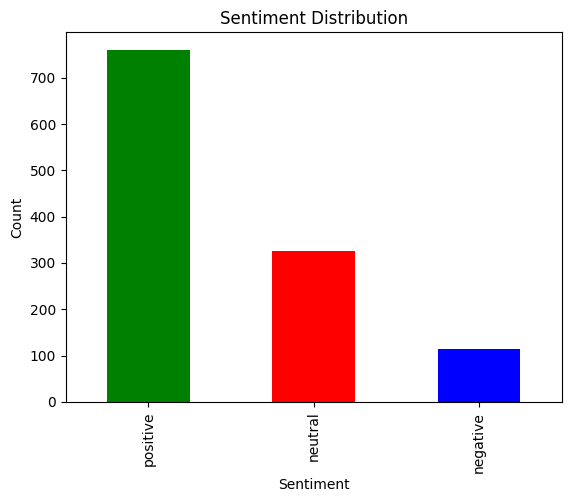

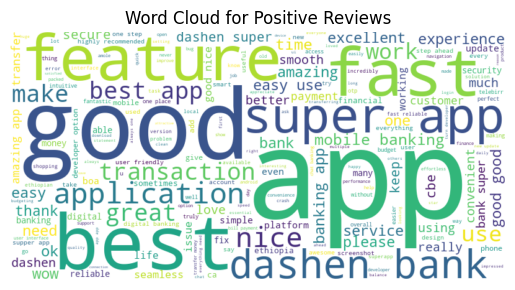

In [23]:
# Sentiment distribution
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

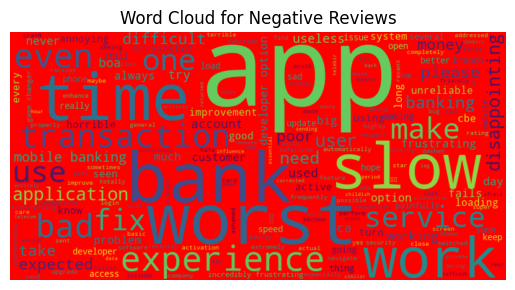

In [22]:
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='red').generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [20]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create an empty DataFrame to store top keywords per bank
top_keywords_per_bank = {}

# Loop through each bank and apply TF-IDF
for bank in df['bank'].unique():
    bank_reviews = df[df['bank'] == bank]['processed_review']
    
    # TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(bank_reviews)
    
    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    
    # Calculate mean TF-IDF scores for each word
    avg_tfidf = tfidf_matrix.mean(axis=0).A1
    tfidf_scores = dict(zip(feature_names, avg_tfidf))
    
    # Get top 15 keywords
    sorted_keywords = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)
    top_keywords = [word for word, score in sorted_keywords[:15]]
    
    top_keywords_per_bank[bank] = top_keywords

# Show results
for bank, keywords in top_keywords_per_bank.items():
    print(f"\nTop keywords for {bank}: {keywords}")



Top keywords for CBE : ['good', 'app', 'best', 'nice', 'ok', 'cbe', 'like', 'bank', 'great', 'easy', 'use', 'excellent', 'fast', 'banking', 'application']

Top keywords for BOA : ['good', 'app', 'best', 'work', 'boa', 'bank', 'nice', 'working', 'mobile', 'worst', 'use', 'great', 'banking', 'application', 'ok']

Top keywords for Dashn: ['app', 'good', 'best', 'dashen', 'super', 'bank', 'banking', 'wow', 'amazing', 'nice', 'easy', 'use', 'fast', 'application', 'feature']


In [44]:
# Group by bank and themes, then count
theme_counts = df.groupby(['bank', 'themes']).size().reset_index(name='count')

# Print theme distribution per bank
for bank in theme_counts['bank'].unique():
    print(f"\n📌 Themes for {bank}:\n")
    print(theme_counts[theme_counts['bank'] == bank][['themes', 'count']])



📌 Themes for BOA :

                                              themes  count
0                                     Account Access      8
1                   Account Access, Customer Support      1
2                Account Access, Speed & Performance      4
3  Account Access, Speed & Performance, Customer ...      1
4                                   Customer Support     16
5                                              Other    336
6                                Speed & Performance     28
7              Speed & Performance, Customer Support      6

📌 Themes for CBE :

                                 themes  count
8                        Account Access      5
9      Account Access, Customer Support      1
10  Account Access, Speed & Performance      1
11                     Customer Support     13
12                                Other    361
13                  Speed & Performance     19

📌 Themes for Dashn:

                                               themes  count
14    

In [26]:
# Define the themes and their keywords
themes = {
    'Account Access': [
        'login', 'password', 'account', 'register', 'signin', 'otp',
        'authentication', 'credentials'
    ],
    'Speed & Performance': [
        'slow', 'fast', 'delay', 'loading', 'crash', 'lag',
        'freeze', 'performance', 'hang', 'unresponsive'
    ],
    'Customer Support': [
        'support', 'help', 'response', 'customer', 'service',
        'feedback', 'complain', 'contact'
    ]
}

# Function to assign themes based on keywords
def assign_theme(text):
    text = text.lower()
    matched_themes = []
    for theme, keywords in themes.items():
        if any(keyword in text for keyword in keywords):
            matched_themes.append(theme)
    return ', '.join(matched_themes) if matched_themes else 'Other'

# Apply the function to processed reviews
df['themes'] = df['processed_review'].apply(assign_theme)

# Show theme distribution per bank
theme_counts = df.groupby(['bank', 'themes']).size().unstack(fill_value=0)
print(theme_counts)


themes  Account Access  Account Access, Customer Support  \
bank                                                       
BOA                  8                                 1   
CBE                  5                                 1   
Dashn               13                                 2   

themes  Account Access, Speed & Performance  \
bank                                          
BOA                                       4   
CBE                                       1   
Dashn                                     3   

themes  Account Access, Speed & Performance, Customer Support  \
bank                                                            
BOA                                                     1       
CBE                                                     0       
Dashn                                                   1       

themes  Customer Support  Other  Speed & Performance  \
bank                                                   
BOA                   16 

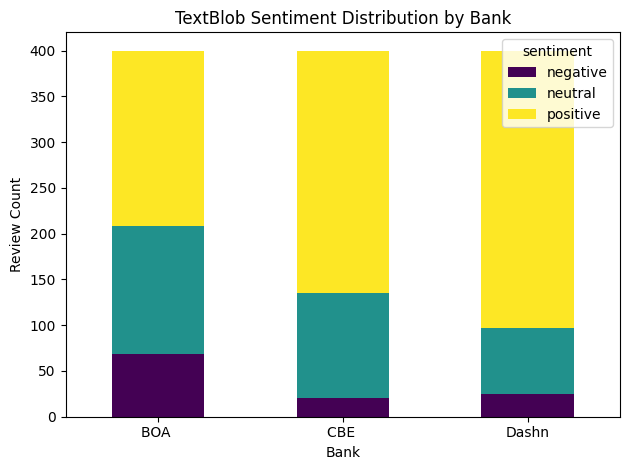

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_counts = df.groupby(['bank', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("TextBlob Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.xticks(rotation=0)
plt.tight_layout()



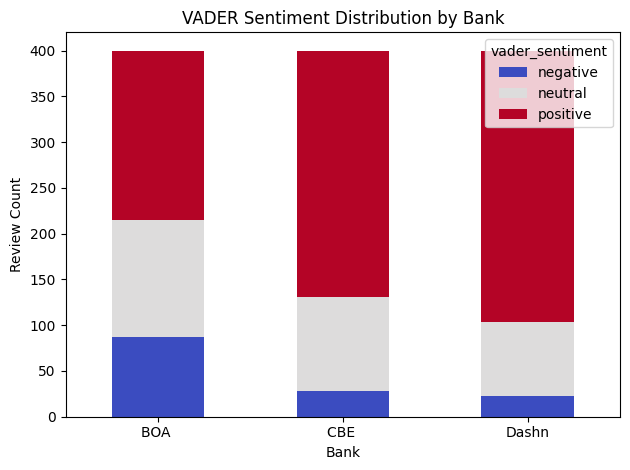

In [32]:
#Sentiment Distribution by Bank (VADER)
vader_counts = df.groupby(['bank', 'vader_sentiment']).size().unstack(fill_value=0)
vader_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title("VADER Sentiment Distribution by Bank")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.xticks(rotation=0)
plt.tight_layout()



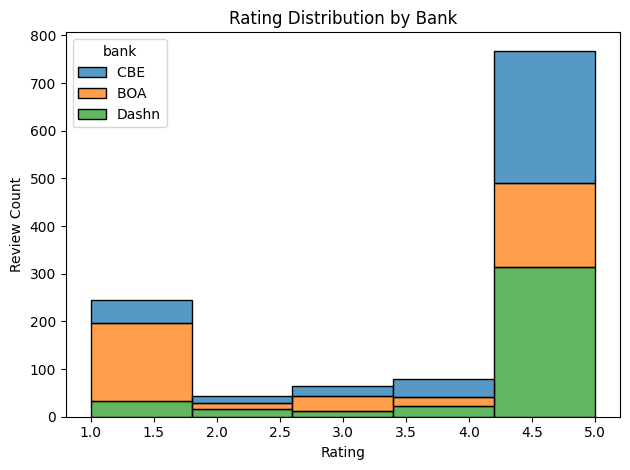

In [35]:
#Rating Distribution
sns.histplot(data=df, x="rating", hue="bank", multiple="stack", bins=5)
plt.title("Rating Distribution by Bank")
plt.xlabel("Rating")
plt.ylabel("Review Count")
plt.tight_layout()



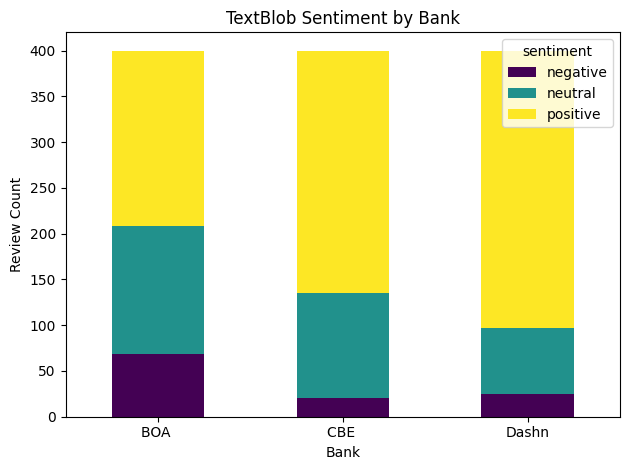

In [43]:
# Group TextBlob sentiment by bank
textblob_sentiment = df.groupby(['bank', 'sentiment']).size().unstack(fill_value=0)

# Plot TextBlob sentiment
textblob_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("TextBlob Sentiment by Bank")
plt.xlabel("Bank")
plt.ylabel("Review Count")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

